In [1]:
# PRECIPITATION COLORMAPS

In [14]:
%%time
############################################
# RUN THIS CELL FIRST TO PROCURE DATA
############################################

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geocat.viz.util as gv
import cmaps, cmocean

### Decide which day to plot (sum day's hourly rainfall)
date = '2017-08-27' #'2022-07-26' #'2021-01-24' #'2022-07-26' # in string format, YYYY-MM-DD
year, month, day = date[0:4], date[5:7], date[8:10]
wy = year if int(month) < 10 else str(int(year)+1) # wy = year+1 if 10 or greater

### Import and process data
dir = '/glade/campaign/collections/rda/data/ds559.0/'
filelist = []
for i in range(0,24): # each hour of the day
    filelist.append(f'{dir}/wy{wy}/{year}{month}/wrf2d_d01_{date}_{i:02}:00:00.nc')
conus404 = xr.open_mfdataset(filelist)
var = conus404['PREC_ACC_NC'].sum(dim='Time').to_numpy()
xlat, xlon = conus404['XLAT'].to_numpy(), conus404['XLONG'].to_numpy()

### Figure parameters relevant to all plots
data_proj = ccrs.PlateCarree()
map_proj = ccrs.LambertConformal()


CPU times: user 12.2 s, sys: 2.5 s, total: 14.7 s
Wall time: 21.9 s


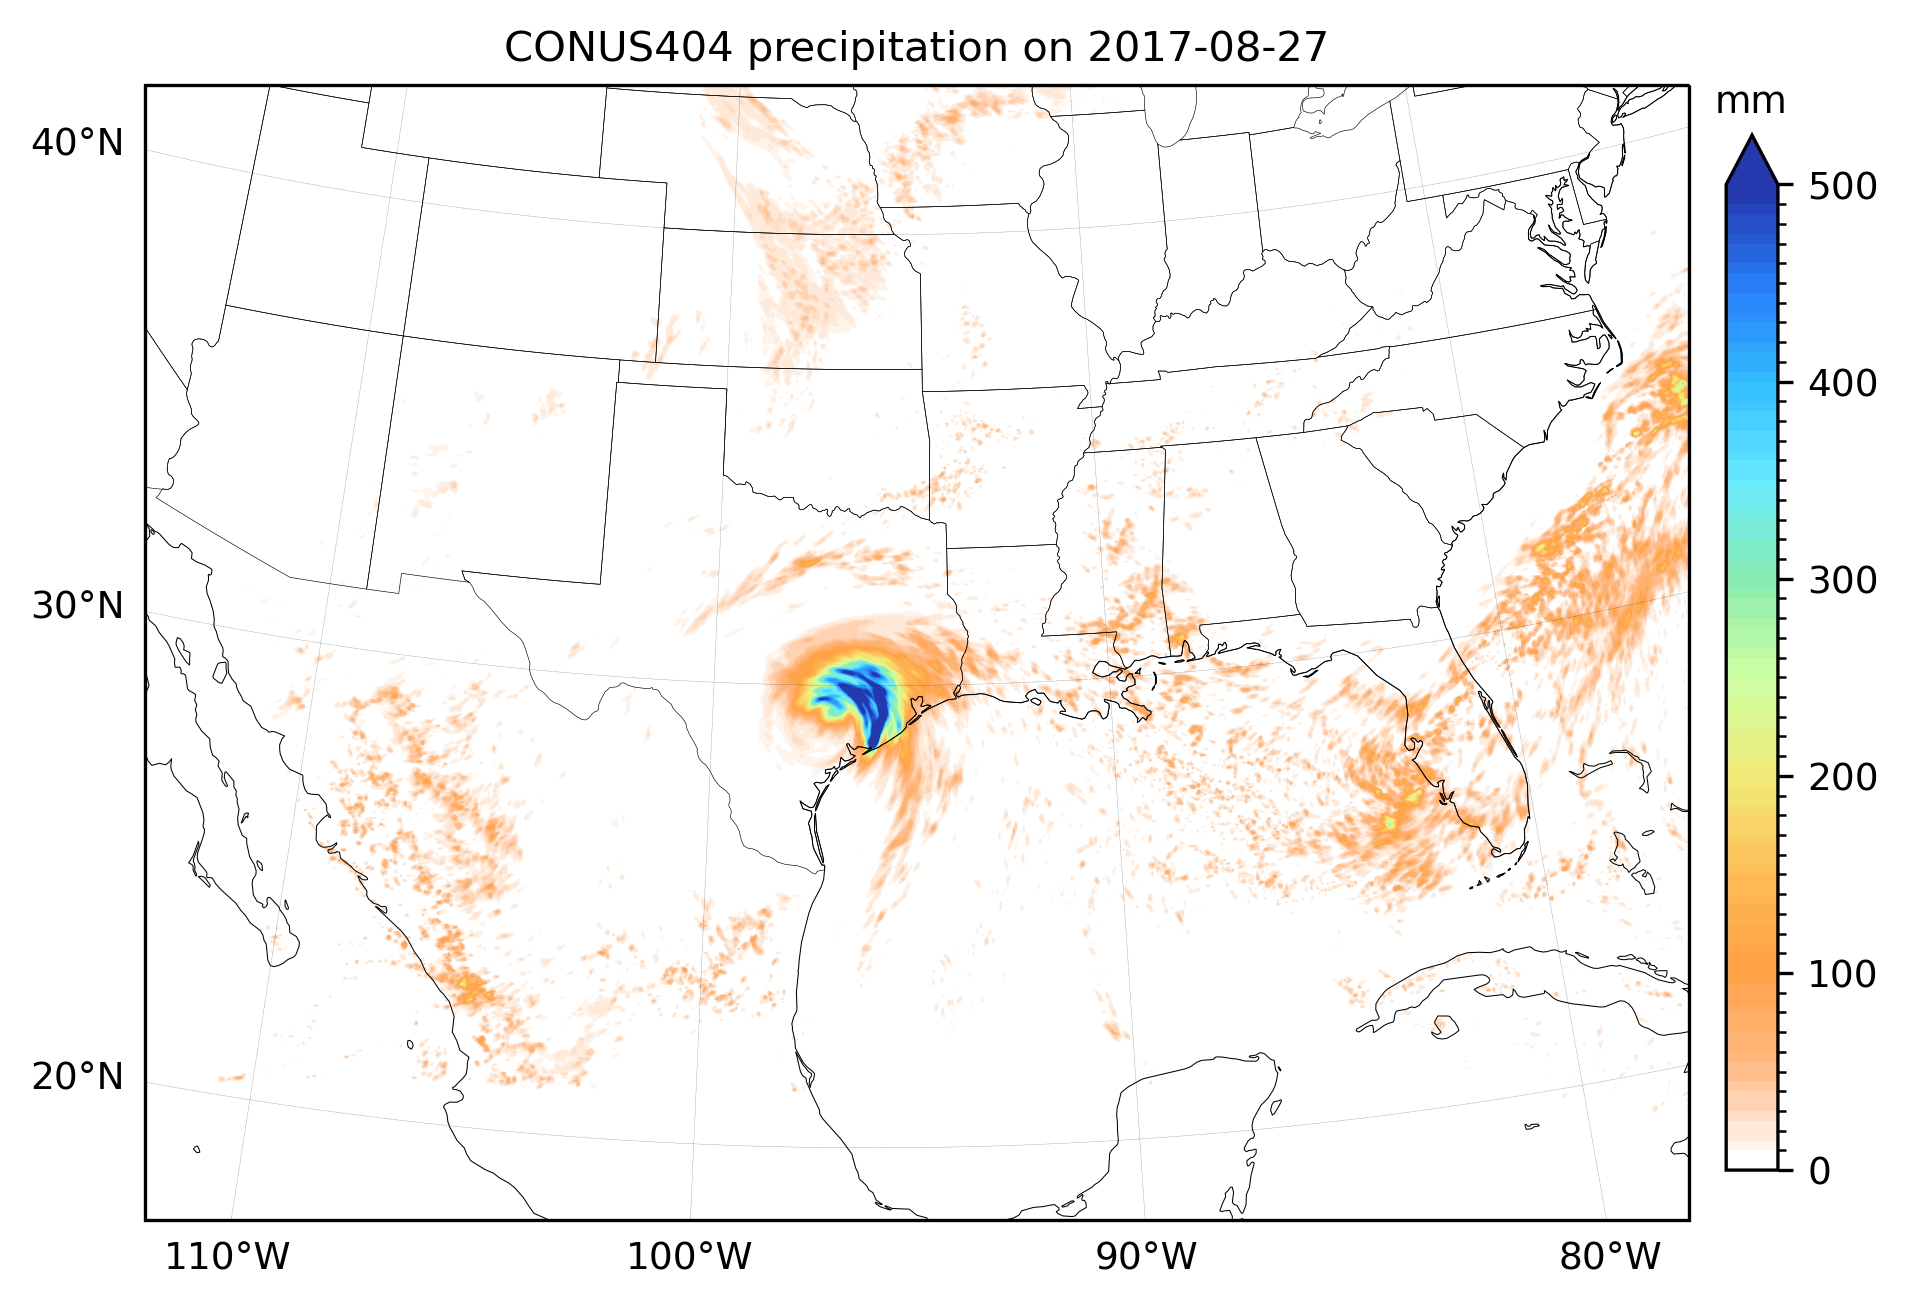

In [28]:
############################################
# cmaps.cmp_haxby_r
############################################

### Color map
cmap_name = 'cmp_haxby_r'
mpl.colormaps.unregister(cmap_name)
colormap = getattr(cmaps,cmap_name)

### Intialize figure
fig, ax = plt.subplots(figsize=(8,8),dpi=300,subplot_kw=dict(projection=map_proj))
ax.set_extent([-112,-78,18,42],data_proj)
ax.add_feature(cfeature.COASTLINE,linewidths=0.25)
ax.add_feature(cfeature.STATES,linewidths=0.15)
ax.set_title(f'CONUS404 precipitation on {date}',loc='center',fontsize=10);

### Ticks and gridlines
gl = ax.gridlines(crs=data_proj,draw_labels=True,alpha=0.5,lw=0.1,color='k',linestyle='--',
                  x_inline=False,y_inline=False)
gl.top_labels, gl.bottom_labels, gl.left_labels, gl.right_labels = False, True, True, False
gl.ylocator, gl.xlocator = mpl.ticker.MultipleLocator(10.), mpl.ticker.MultipleLocator(10.)
gl.ylabel_style = {'size':9,'rotation':0,'ha':'right','va':'center'}
gl.xlabel_style = {'size':9,'rotation':0,'ha':'center','va':'top'}
gl.ypadding, gl.xpadding = 5, 5

### Plot variable
loval, hival, spval, majtick, mintick = 0, 500, 5, 100, 10
cntr = ax.contourf(xlon,xlat,var,cmap=colormap,transform=data_proj,levels=np.arange(loval,hival+spval,spval),extend='max') 

### Color Bar
bar = fig.colorbar(cntr,ax=ax,orientation='vertical',ticks=mpl.ticker.MultipleLocator(majtick),
                   shrink=0.56,pad=0.02,spacing='proportional')
bar.ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(mintick))
bar.ax.tick_params(labelsize=9)
ax.text(1.04,0.985,'mm',ha='center',va='center',fontsize=9,transform=ax.transAxes); 

### Save figure
plt.savefig(f'Precipitation_{cmap_name}.png',bbox_inches='tight')


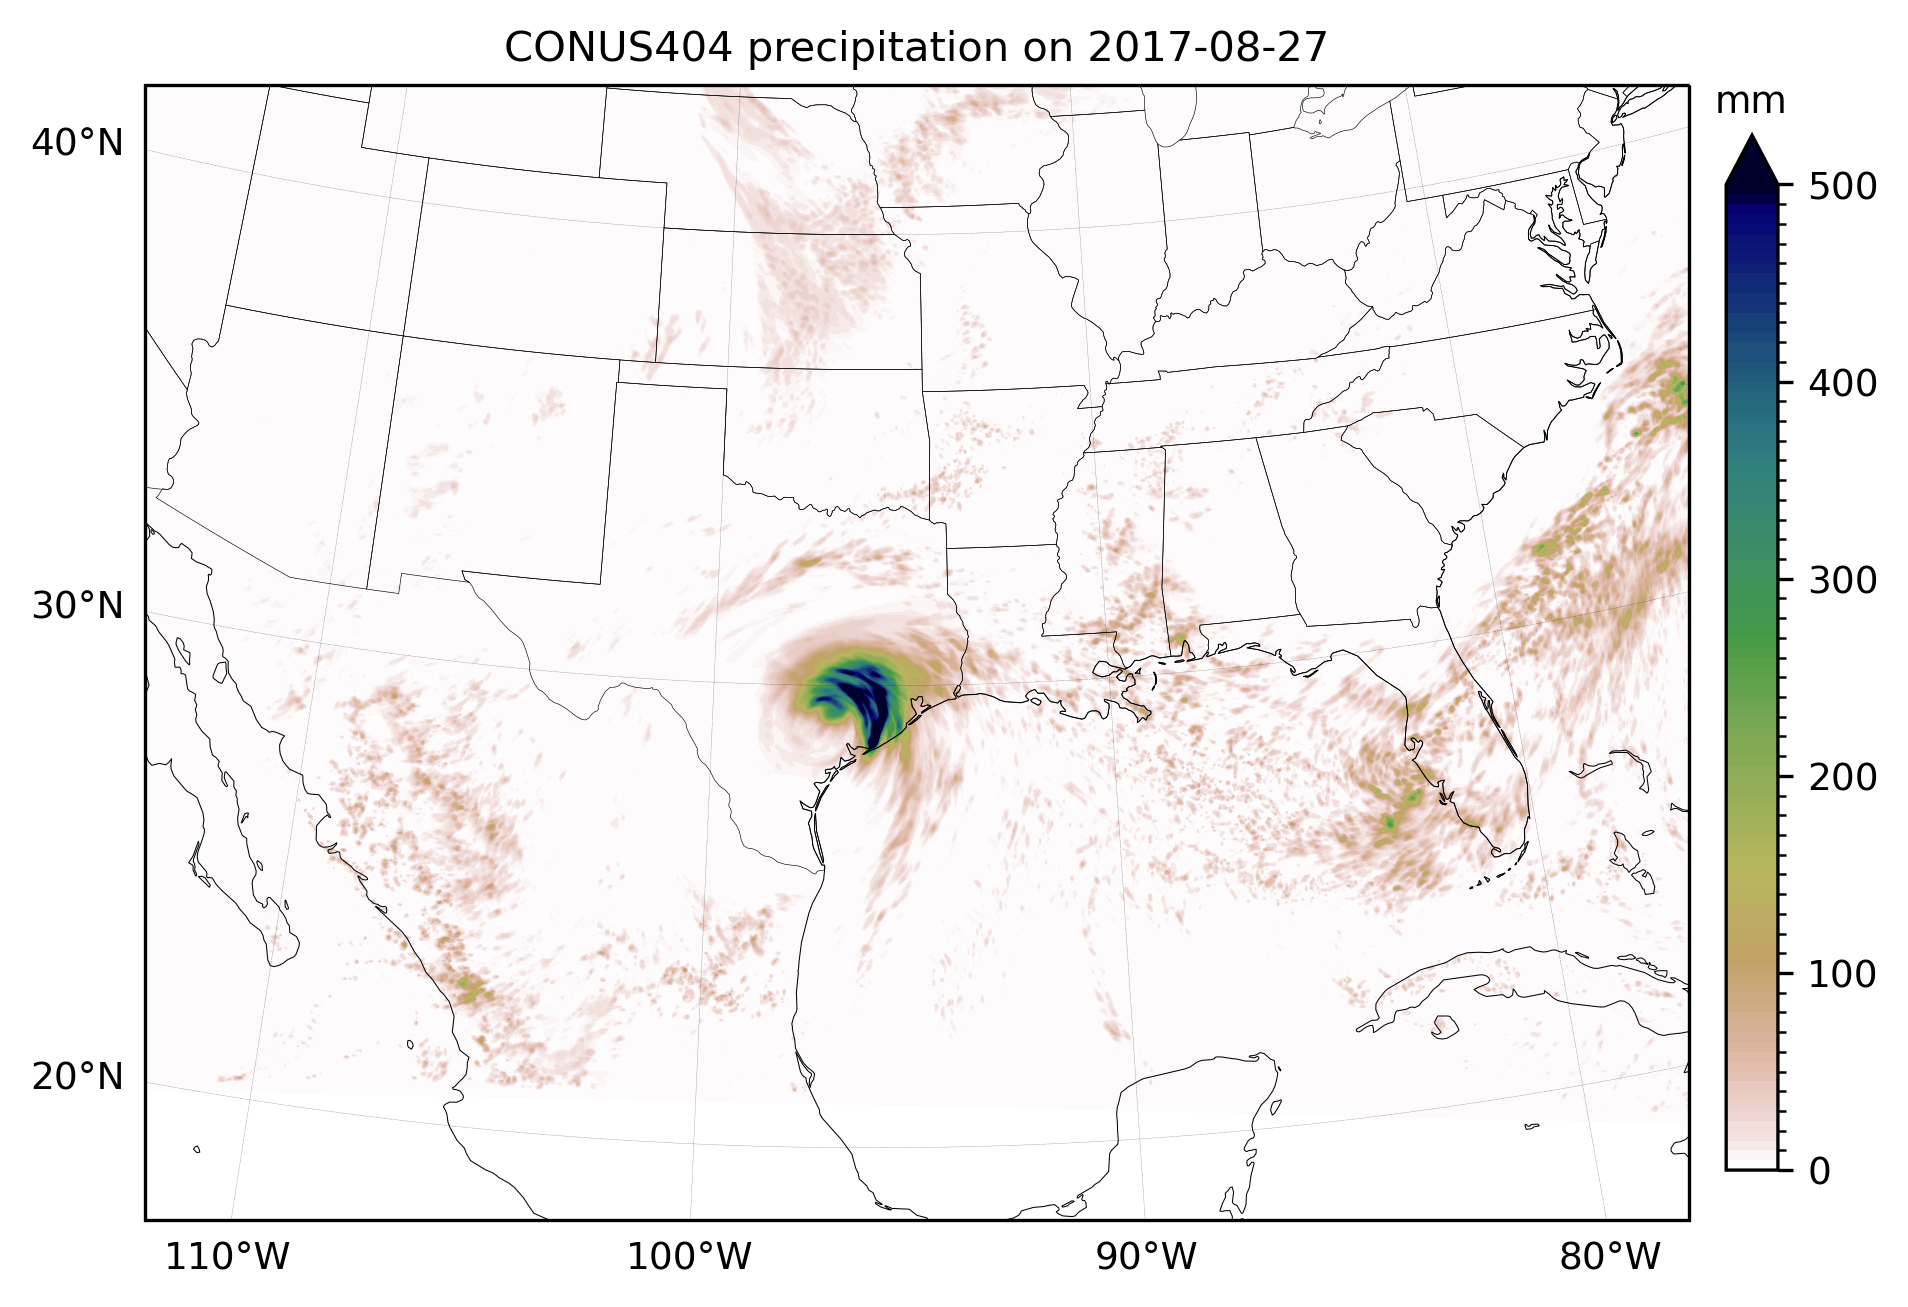

In [34]:
############################################
# cmaps.MPL_gist_earth_r
############################################

### Color map
cmap_name = 'MPL_gist_earth_r'
mpl.colormaps.unregister(cmap_name)
colormap = getattr(cmaps,cmap_name)

### Intialize figure
fig, ax = plt.subplots(figsize=(8,8),dpi=300,subplot_kw=dict(projection=map_proj))
ax.set_extent([-112,-78,18,42],data_proj)
ax.add_feature(cfeature.COASTLINE,linewidths=0.25)
ax.add_feature(cfeature.STATES,linewidths=0.15)
ax.set_title(f'CONUS404 precipitation on {date}',loc='center',fontsize=10);

### Ticks and gridlines
gl = ax.gridlines(crs=data_proj,draw_labels=True,alpha=0.5,lw=0.1,color='k',linestyle='--',
                  x_inline=False,y_inline=False)
gl.top_labels, gl.bottom_labels, gl.left_labels, gl.right_labels = False, True, True, False
gl.ylocator, gl.xlocator = mpl.ticker.MultipleLocator(10.), mpl.ticker.MultipleLocator(10.)
gl.ylabel_style = {'size':9,'rotation':0,'ha':'right','va':'center'}
gl.xlabel_style = {'size':9,'rotation':0,'ha':'center','va':'top'}
gl.ypadding, gl.xpadding = 5, 5

### Plot variable
loval, hival, spval, majtick, mintick = 0, 500, 5, 100, 10
cntr = ax.contourf(xlon,xlat,var,cmap=colormap,transform=data_proj,levels=np.arange(loval,hival+spval,spval),extend='max') 

### Color Bar
bar = fig.colorbar(cntr,ax=ax,orientation='vertical',ticks=mpl.ticker.MultipleLocator(majtick),
                   shrink=0.56,pad=0.02,spacing='proportional')
bar.ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(mintick))
bar.ax.tick_params(labelsize=9)
ax.text(1.04,0.985,'mm',ha='center',va='center',fontsize=9,transform=ax.transAxes); 

### Save figure
plt.savefig(f'Precipitation_{cmap_name}.png',bbox_inches='tight')


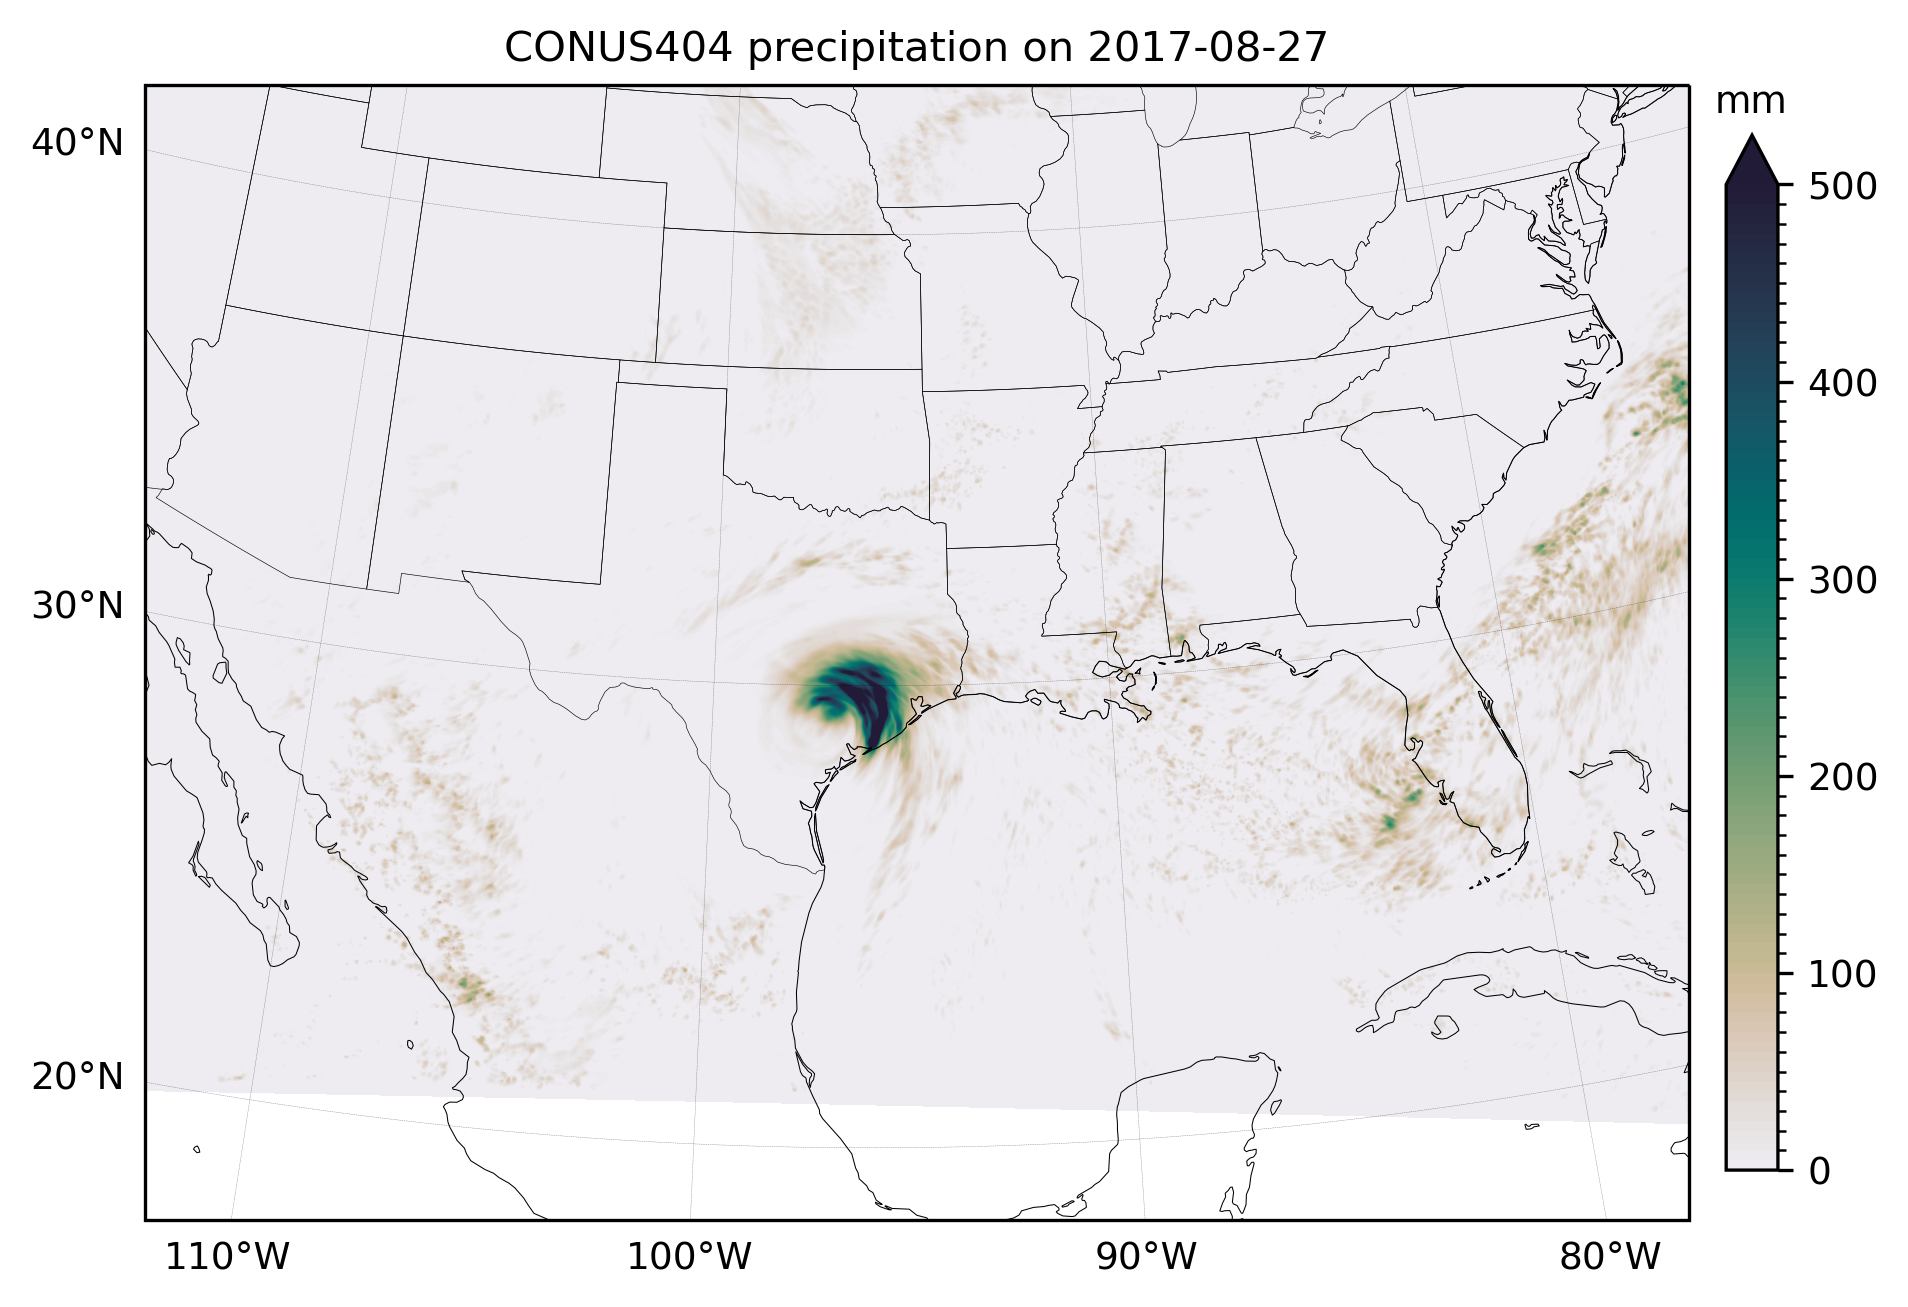

In [36]:
############################################
# cmocean.cm.rain
############################################

### Color map
cmap_name = 'cmocean.cm.rain'
colormap = cmocean.cm.rain

### Intialize figure
fig, ax = plt.subplots(figsize=(8,8),dpi=300,subplot_kw=dict(projection=map_proj))
ax.set_extent([-112,-78,18,42],data_proj)
ax.add_feature(cfeature.COASTLINE,linewidths=0.25)
ax.add_feature(cfeature.STATES,linewidths=0.15)
ax.set_title(f'CONUS404 precipitation on {date}',loc='center',fontsize=10);

### Ticks and gridlines
gl = ax.gridlines(crs=data_proj,draw_labels=True,alpha=0.5,lw=0.1,color='k',linestyle='--',
                  x_inline=False,y_inline=False)
gl.top_labels, gl.bottom_labels, gl.left_labels, gl.right_labels = False, True, True, False
gl.ylocator, gl.xlocator = mpl.ticker.MultipleLocator(10.), mpl.ticker.MultipleLocator(10.)
gl.ylabel_style = {'size':9,'rotation':0,'ha':'right','va':'center'}
gl.xlabel_style = {'size':9,'rotation':0,'ha':'center','va':'top'}
gl.ypadding, gl.xpadding = 5, 5

### Plot variable
loval, hival, spval, majtick, mintick = 0, 500, 5, 100, 10
cntr = ax.contourf(xlon,xlat,var,cmap=colormap,transform=data_proj,levels=np.arange(loval,hival+spval,spval),extend='max') 

### Color Bar
bar = fig.colorbar(cntr,ax=ax,orientation='vertical',ticks=mpl.ticker.MultipleLocator(majtick),
                   shrink=0.56,pad=0.02,spacing='proportional')
bar.ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(mintick))
bar.ax.tick_params(labelsize=9)
ax.text(1.04,0.985,'mm',ha='center',va='center',fontsize=9,transform=ax.transAxes); 

### Save figure
plt.savefig(f'Precipitation_{cmap_name}.png',bbox_inches='tight')


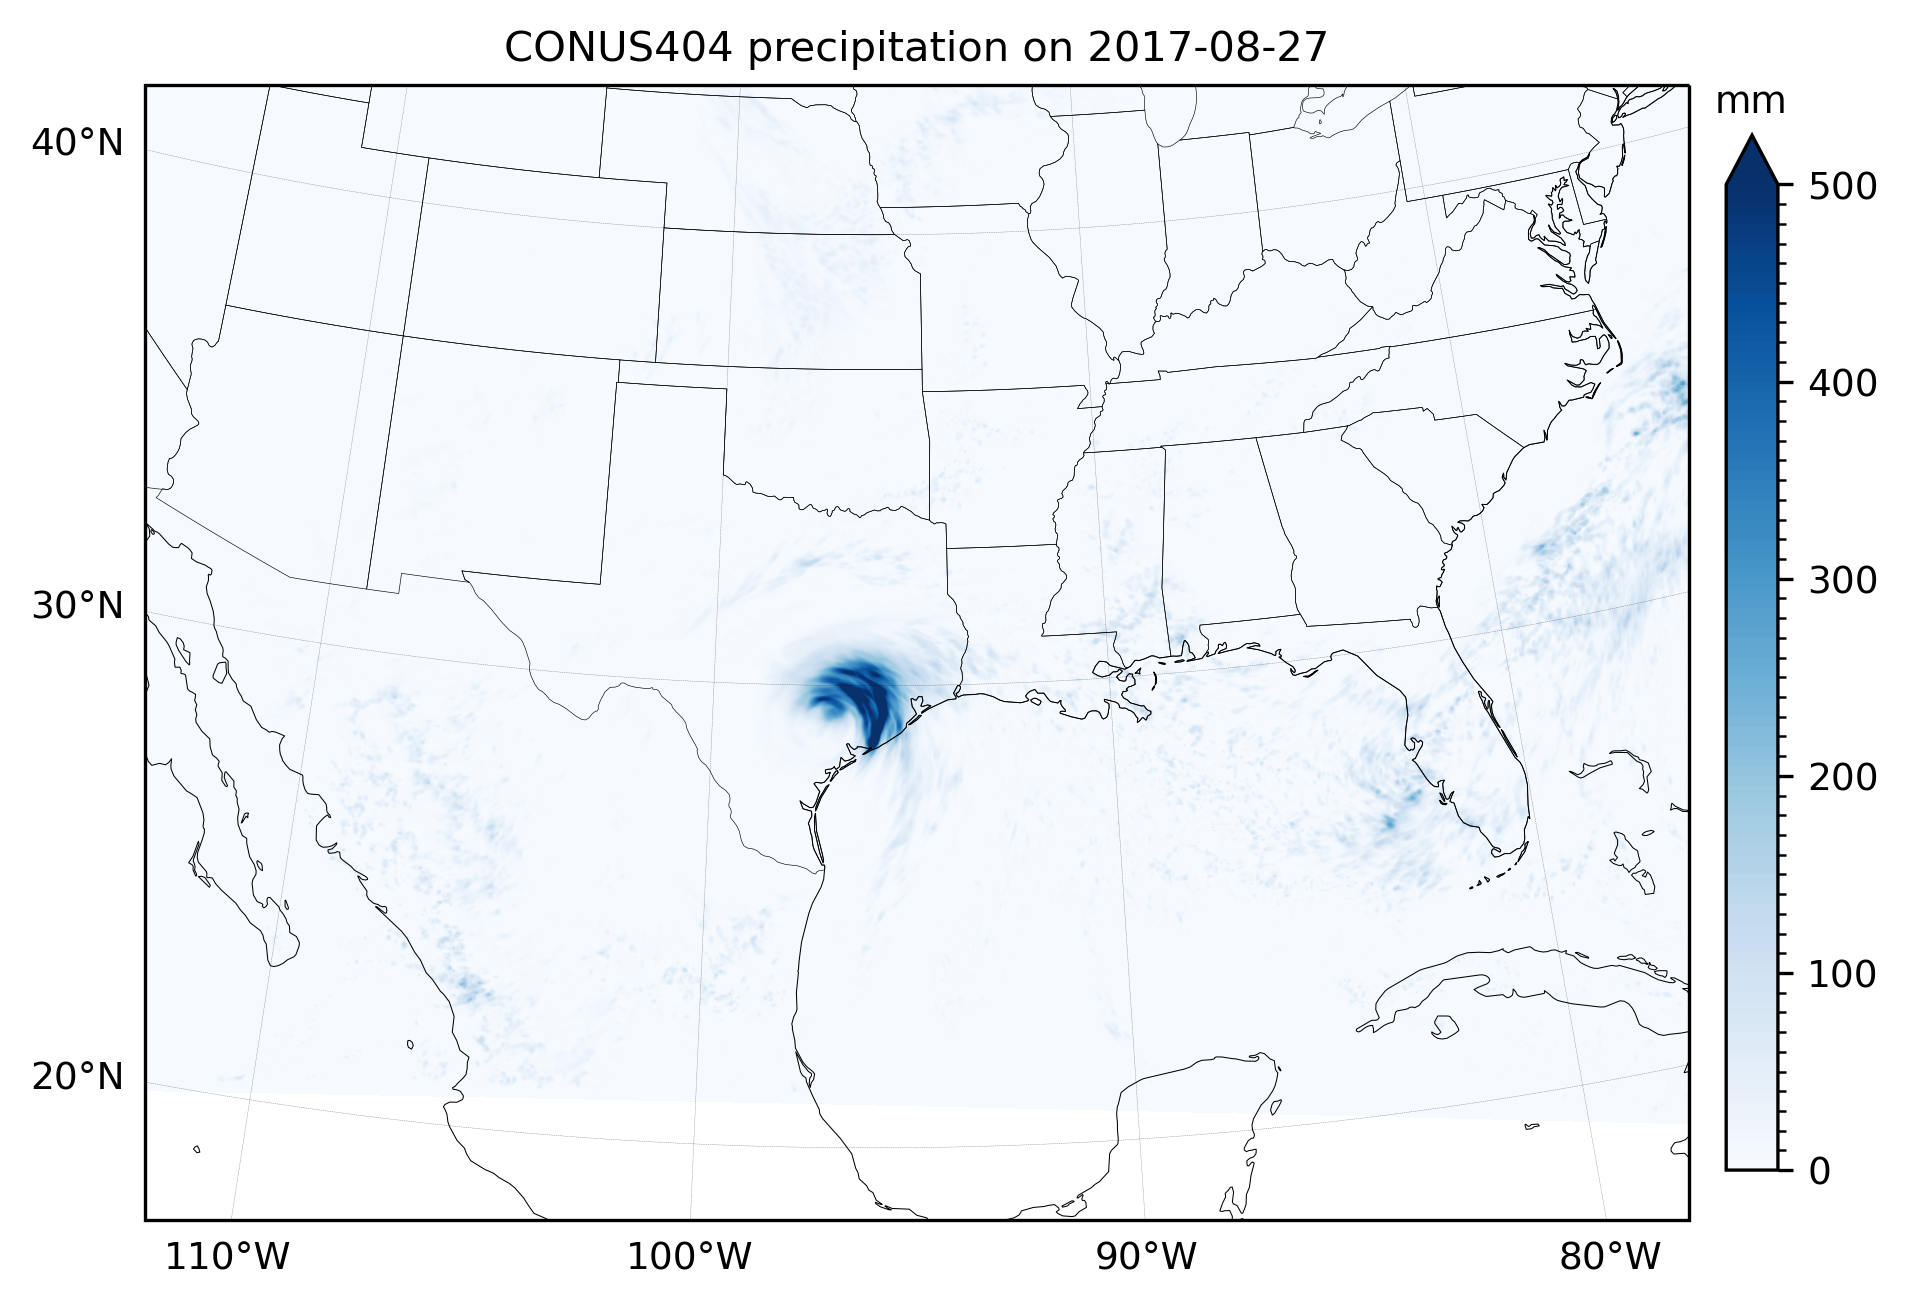

In [33]:
############################################
# matplotlib: 'Blues'
############################################

### Color map
cmap_name = 'Blues'
colormap = cmap_name

### Intialize figure
fig, ax = plt.subplots(figsize=(8,8),dpi=300,subplot_kw=dict(projection=map_proj))
ax.set_extent([-112,-78,18,42],data_proj)
ax.add_feature(cfeature.COASTLINE,linewidths=0.25)
ax.add_feature(cfeature.STATES,linewidths=0.15)
ax.set_title(f'CONUS404 precipitation on {date}',loc='center',fontsize=10);

### Ticks and gridlines
gl = ax.gridlines(crs=data_proj,draw_labels=True,alpha=0.5,lw=0.1,color='k',linestyle='--',
                  x_inline=False,y_inline=False)
gl.top_labels, gl.bottom_labels, gl.left_labels, gl.right_labels = False, True, True, False
gl.ylocator, gl.xlocator = mpl.ticker.MultipleLocator(10.), mpl.ticker.MultipleLocator(10.)
gl.ylabel_style = {'size':9,'rotation':0,'ha':'right','va':'center'}
gl.xlabel_style = {'size':9,'rotation':0,'ha':'center','va':'top'}
gl.ypadding, gl.xpadding = 5, 5

### Plot variable
loval, hival, spval, majtick, mintick = 0, 500, 5, 100, 10
cntr = ax.contourf(xlon,xlat,var,cmap=colormap,transform=data_proj,levels=np.arange(loval,hival+spval,spval),extend='max') 

### Color Bar
bar = fig.colorbar(cntr,ax=ax,orientation='vertical',ticks=mpl.ticker.MultipleLocator(majtick),
                   shrink=0.56,pad=0.02,spacing='proportional')
bar.ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(mintick))
bar.ax.tick_params(labelsize=9)
ax.text(1.04,0.985,'mm',ha='center',va='center',fontsize=9,transform=ax.transAxes); 

### Save figure
plt.savefig(f'Precipitation_{cmap_name}.png',bbox_inches='tight')
